In [1]:
import pandas as pd

In [109]:
df = pd.read_csv('./datosIncendios2018.csv', decimal = ',').iloc[:,1:]

In [110]:
headers = ['fecha', 'nombre', 'provincia', 'altitud', 'tmed', 'prec',
  'tmin', 'tmax', 'dir', 'velmedia', 'sol', 'presmax', 'presmin','incendio']

In [111]:
dfIncendios = dfI[headers]

In [112]:
dfIncendios = dfIncendios.dropna()

In [113]:
dfIncendios.shape

(61691, 14)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126bd6390>]],
      dtype=object)

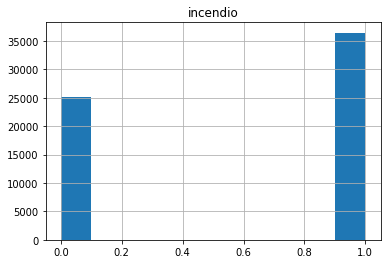

In [114]:
distribucion = pd.DataFrame.hist(dfIncendios, column='incendio')
distribucion

In [115]:
dfIncendios.head(5)

,fecha,nombre,provincia,altitud,tmed,prec,tmin,tmax,dir,velmedia,sol,presmax,presmin,incendio
1,2018-01-01,TENERIFE NORTE AEROPUERTO,STA. CRUZ DE TENERIFE,632,15.8,"0,0","12,3","19,3",99,"1,7","4,3","959,2","956,3",1
2,2018-01-01,ANTEQUERA,MALAGA,408,9,"0,0","3,1","14,9",04,"0,3","986,5",10,15,1
3,2018-01-01,TALARN,LLEIDA,807,4.6,"4,2","-0,1","9,3",28,"3,3","6,3","932,8","926,4",1
6,2018-01-01,OURENSE,OURENSE,143,10,"0,8","4,5","15,5",28,"2,2","0,8","1013,4","1010,7",1
8,2018-01-01,VILLAFRANCA DEL CID/VILLAFRANCA,CASTELLON,1131,7.6,"0,0","2,1","13,1",30,"9,2","8,3","898,6","894,2",1


In [191]:
trainFeatures = ['altitud', 'tmed', 'prec', 'tmin', 'tmax', 'dir', 'velmedia', 'sol', 'presmax', 'presmin']
testFeature = ['incendio']

In [192]:
trainDf = dfIncendios[trainFeatures]
testDf = dfIncendios[testFeature]

In [193]:
trainDf.dtypes

altitud      int64
tmed        object
prec        object
tmin        object
tmax        object
dir         object
velmedia    object
sol         object
presmax     object
presmin     object
dtype: object

In [194]:
trainDf.head(3)

,altitud,tmed,prec,tmin,tmax,dir,velmedia,sol,presmax,presmin
1,632,15.8,"0,0","12,3","19,3",99,"1,7","4,3","959,2","956,3"
2,408,9,"0,0","3,1","14,9",04,"0,3","986,5",10,15
3,807,4.6,"4,2","-0,1","9,3",28,"3,3","6,3","932,8","926,4"


In [248]:
trainDfnumeric = trainDf[['prec', 'tmin', 'tmax', 'dir', 'velmedia', 'sol']].apply(lambda x: x.str.replace(',', '.'), axis=1)


KeyboardInterrupt: 

In [260]:
trainDfnumeric = trainDfnumeric[['prec', 'tmin', 'tmax', 'dir', 'velmedia', 'sol']].apply(lambda x: x.str.replace('Varias', '10'), axis=1)


In [261]:
trainDf2 = pd.concat([trainDf['altitud'], trainDfnumeric], axis = 1)

In [262]:
trainDf2 = trainDf2.apply(pd.to_numeric)

In [266]:
trainDf2.to_csv('train.csv')
testDf.to_csv('test.csv')

In [263]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(trainDf2, testDf, test_size=0.33)

In [264]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')

In [265]:
clf.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: 